<a href="https://colab.research.google.com/github/h4r1c0t/WildCodeSchool/blob/master/Dojo/G1_dojo_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chargez les données disponibles à l'adresse suivante: url = https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip. Ce sont les données utilisées lors du checkpoint.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)

Vérifiez la présence de valeurs nulles ou manquantes et afficher les types des différentes variables.

In [36]:
df_music.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [37]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

Réalisez un analyse en composantes principales. Pour cela: 
- sélectionnez les variables numériques pertinentes
- centrez et réduisez les données 
- appliquez l'ACP
- faites le graphique de la variance expliquée
- déterminez le nombre de composantes à garder 
- affichez la nouvelle table avec uniquement les composantes principales sélectionnées

In [38]:
obj = df_music.columns[df_music.dtypes.values == np.dtype("object")]
obj
columnsNames = [x for x in df_music.columns if x not in obj]
columnsNames

['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [39]:
X = df_music[columnsNames]
scaler = StandardScaler()
scaler.fit(X)

scaled = scaler.transform(X)
scaled

array([[-2.26100656,  0.6833763 , -0.89093479, ..., -0.36796995,
         1.5956073 ,  1.38074423],
       [-2.20603102, -0.34546718,  0.19199369, ..., -0.18308213,
         1.82325339,  1.38843461],
       [-2.09607995,  1.6445698 ,  0.58529607, ..., -0.45583209,
        -0.5883258 , -0.33421214],
       ...,
       [ 0.32284371,  1.50081358, -0.20130869, ...,  0.14680516,
        -1.08520529,  1.37689903],
       [ 0.1579171 , -0.30036719,  1.02708778, ...,  0.13602453,
        -0.57075233,  0.13105629],
       [-0.33686274, -0.7646152 ,  1.09712793, ..., -0.49625945,
        -0.12199762,  0.09260435]])

- appliquez l'ACP
- faites le graphique de la variance expliquée
- déterminez le nombre de composantes à garder
- affichez la nouvelle table avec uniquement les composantes principales sélectionnées

In [0]:
from sklearn.decomposition import PCA
pca = PCA()

In [41]:
X_acp = pca.fit_transform(scaled)
X_acp

array([[-0.99045021,  0.99939247, -0.15971079, ..., -0.57606002,
        -1.16234344,  0.04739106],
       [-1.20961308,  0.27304197, -0.6842291 , ...,  0.05743423,
        -0.09104391, -0.13059361],
       [ 2.1124023 ,  0.35316191, -1.86682122, ...,  0.8724981 ,
        -0.59542754, -0.0997507 ],
       ...,
       [ 0.32506902,  0.19737258, -1.67204781, ..., -1.47518739,
        -0.71435391, -0.34179443],
       [-1.06009706,  0.64113552, -0.34201002, ...,  0.57789031,
        -0.12977614,  0.2320321 ],
       [-0.74982873, -0.6666449 , -0.23754489, ...,  0.85888183,
         0.1452915 , -0.38296445]])

In [42]:
print(pca.explained_variance_ratio_)

[0.3282235  0.15545747 0.10647707 0.09089407 0.07833839 0.06879605
 0.05798688 0.04412532 0.03410832 0.02515864 0.01043429]


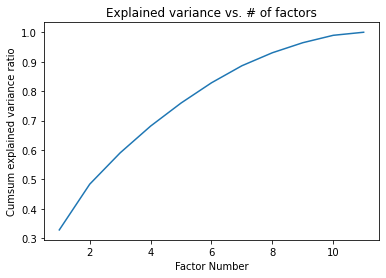

In [43]:
import matplotlib.pyplot as plt

# Nombre d'observations
p = X.shape[1]
# Nombre de variables
n = X.shape[0]

plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor Number")

plt.show()

- déterminez le nombre de composantes à garder
- affichez la nouvelle table avec uniquement les composantes principales sélectionnées

In [0]:
pca = PCA(n_components=6)

In [0]:
X_acp = pca.fit_transform(scaled)
toto = pca.inverse_transform(X_acp)

In [0]:
toto1 = pd.DataFrame(toto)

Réalisez une projection des données dans le premier plan  factoriel (PC1 et PC2 en *x* et *y*) et colorez les morceaux par genre.

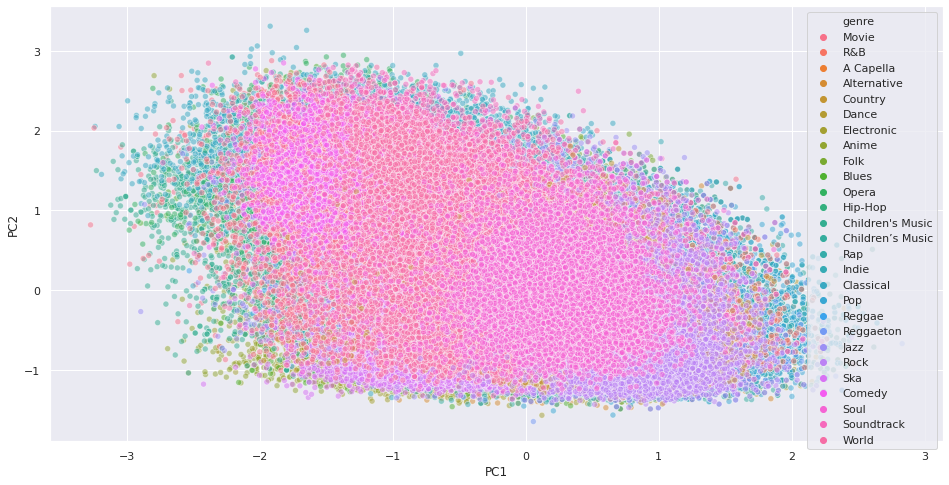

In [61]:
p = plt.figure(figsize=(16, 8))
p = sns.scatterplot(x = toto1.iloc[:, 0], y = toto1.iloc[:, 1], hue = df_music['genre'], alpha = .5)
p = plt.xlabel('PC1')
p = plt.ylabel('PC2')
plt.show()

In [47]:
pca_df = pd.DataFrame(pca.components_)
pca_df

,0,1,2,3,4,5,6,7,8,9,10
0,-0.236393,0.420229,-0.334241,0.060030,-0.446287,0.321809,-0.029651,-0.467035,-0.029707,-0.157179,-0.323858
1,-0.298460,0.187724,0.060193,-0.032756,0.096927,-0.182884,0.619322,-0.024656,0.645562,-0.149379,0.070085
2,0.099432,-0.208551,-0.450707,0.593525,0.246985,0.069852,0.253737,0.153415,0.028522,0.258978,-0.411739
3,0.422120,0.006879,0.239688,0.418326,-0.097178,-0.132957,-0.056658,0.011412,0.068079,-0.733222,-0.128881
4,-0.473682,0.028268,0.237631,0.644701,0.000246,0.156964,-0.124903,-0.063323,-0.095448,0.057179,0.496075
5,0.320834,0.300901,0.222681,0.227094,-0.350026,-0.443867,-0.111798,-0.155151,0.211651,0.550133,-0.042618


Si vous avez terminé, réalisez le cercle des corrélations dans le premier plan factoriel.

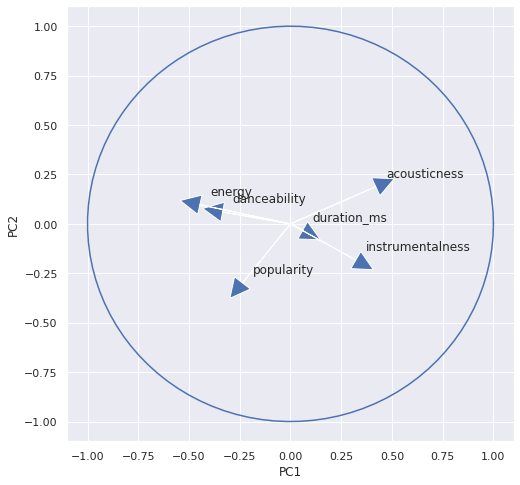

In [62]:
sns.set()

(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, len(pca.components_)):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
            pca.components_[1, i] + 0.05,
            columnsNames[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circ
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()